In [1]:
from skmultiflow.data import SEAGenerator

In [2]:
stream = SEAGenerator()      # create a stream
stream.prepare_for_use()     # prepare the stream for use

H:\Anaconda3\lib\site-packages\skmultiflow\data\base_stream.py:194: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  category=FutureWarning)


In [3]:
X,Y = stream.next_sample()

In [7]:
Y

array([1], dtype=int64)

In [17]:
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential
tree = HoeffdingTreeClassifier()

In [10]:
from tqdm import tqdm

In [37]:
correctness_dist = []
nb_iters = 100000
evaluator=EvaluatePrequential(show_plot=True,max_samples=nb_iters)
for i in tqdm(range(nb_iters)):
    X, Y = stream.next_sample()        # get the next sample
    prediction = tree.predict(X)       # predict Y using the tree     
    if Y == prediction:                # check the prediction
        correctness_dist.append(1)
    else:
        correctness_dist.append(0)   
    tree.partial_fit(X, Y)             # update the tree
#evaluator.evaluate(stream=stream, model=tree)

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:20<00:00, 4781.71it/s]


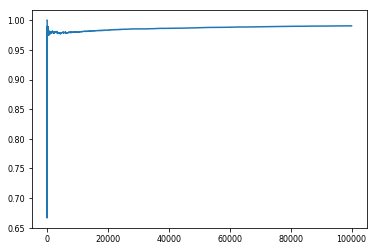

In [38]:
import matplotlib.pyplot as plt
time = [i for i in range(1, nb_iters)]
accuracy = [sum(correctness_dist[:i])/len(correctness_dist[:i]) for i in range(1, nb_iters)]
plt.plot(time, accuracy)

In [39]:
accuracy[9998]

0.97999799979998

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
Processed samples: 200
Mean performance:


TypeError: 'NoneType' object is not subscriptable

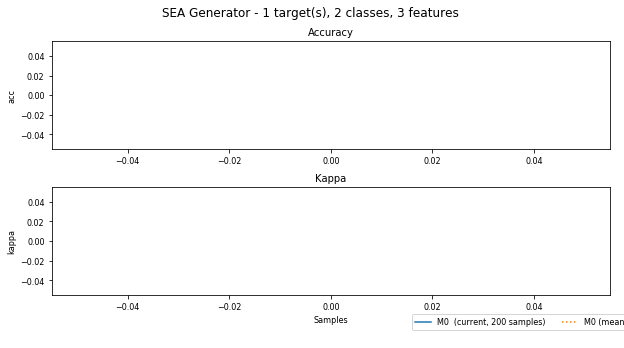